In [2]:
import findspark
findspark.init()


In [3]:
import pyspark
from pyspark.sql import SparkSession

In [4]:
sp=SparkSession.builder.appName('Zoo').getOrCreate()

In [5]:
df=sp.read.csv('d:\\zoo.csv',header=True,inferSchema=True)

In [5]:
df.limit(6).toPandas()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [7]:
df.printSchema()

root
 |-- animal_name: string (nullable = true)
 |-- hair: integer (nullable = true)
 |-- feathers: integer (nullable = true)
 |-- eggs: integer (nullable = true)
 |-- milk: integer (nullable = true)
 |-- airborne: integer (nullable = true)
 |-- aquatic: integer (nullable = true)
 |-- predator: integer (nullable = true)
 |-- toothed: integer (nullable = true)
 |-- backbone: integer (nullable = true)
 |-- breathes: integer (nullable = true)
 |-- venomous: integer (nullable = true)
 |-- fins: integer (nullable = true)
 |-- legs: integer (nullable = true)
 |-- tail: integer (nullable = true)
 |-- domestic: integer (nullable = true)
 |-- catsize: integer (nullable = true)
 |-- class_type: integer (nullable = true)



In [11]:
#Analyse and process the Data  in such a way that it will be ready to do some predictions or  train some machine learning model 
print(df.count())
df.dropna()

101


DataFrame[animal_name: string, hair: int, feathers: int, eggs: int, milk: int, airborne: int, aquatic: int, predator: int, toothed: int, backbone: int, breathes: int, venomous: int, fins: int, legs: int, tail: int, domestic: int, catsize: int, class_type: int]

In [12]:
df.count()

101

In [48]:
#Make a ML Model which will be able to predict the category of animal based on the features you provide. 
#Check the performance matrix of the Model.
df.select('legs').distinct().show()

+----+
|legs|
+----+
|   6|
|   5|
|   4|
|   8|
|   2|
|   0|
+----+



In [16]:
df.columns[1:]

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [49]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
va=VectorAssembler(inputCols=df.columns[1:],outputCol='inputfeat')
df1=va.transform(df)
df1.show()

IllegalArgumentException: Output column inputfeat already exists.

In [32]:
d.show()

+-----------+----+--------+----+----+--------+-------+--------+-------+--------+--------+--------+----+----+----+--------+-------+----------+--------------------+
|animal_name|hair|feathers|eggs|milk|airborne|aquatic|predator|toothed|backbone|breathes|venomous|fins|legs|tail|domestic|catsize|class_type|          inputsfeat|
+-----------+----+--------+----+----+--------+-------+--------+-------+--------+--------+--------+----+----+----+--------+-------+----------+--------------------+
|   aardvark|   1|       0|   0|   1|       0|      0|       1|      1|       1|       1|       0|   0|   4|   0|       0|      1|         1|(34,[0,3,6,7,8,9,...|
|   antelope|   1|       0|   0|   1|       0|      0|       0|      1|       1|       1|       0|   0|   4|   1|       0|      1|         1|(34,[0,3,7,8,9,12...|
|       bass|   0|       0|   1|   0|       0|      1|       1|      1|       1|       0|       0|   1|   0|   1|       0|      0|         4|(34,[2,5,6,7,8,11...|
|       bear|   1|    

In [50]:
finaldata=df2.select('inputfeat','legs')
finaldata.show()

+--------------------+----+
|           inputfeat|legs|
+--------------------+----+
|(17,[0,3,6,7,8,9,...|   4|
|(17,[0,3,7,8,9,12...|   4|
|(17,[2,5,6,7,8,11...|   0|
|(17,[0,3,6,7,8,9,...|   4|
|(17,[0,3,6,7,8,9,...|   4|
|(17,[0,3,7,8,9,12...|   4|
|(17,[0,3,7,8,9,12...|   4|
|(17,[2,5,7,8,11,1...|   0|
|(17,[2,5,6,7,8,11...|   0|
|(17,[0,3,7,8,9,12...|   4|
|(17,[0,3,6,7,8,9,...|   4|
|(17,[1,2,4,8,9,12...|   2|
|(17,[2,5,6,7,8,11...|   0|
|(17,[2,6,16],[1.0...|   0|
|(17,[2,5,6,12,16]...|   4|
|(17,[2,5,6,12,16]...|   6|
|(17,[1,2,4,6,8,9,...|   2|
|(17,[0,3,7,8,9,12...|   4|
|(17,[2,5,6,7,8,11...|   0|
|(17,[3,5,6,7,8,9,...|   0|
+--------------------+----+
only showing top 20 rows



In [51]:
train,test=finaldata.randomSplit([.70,.30])

In [55]:
from pyspark.ml.classification  import DecisionTreeClassifier
dtcmodel=DecisionTreeClassifier(labelCol='legs',featuresCol='inputfeat')

In [56]:
model=dtcmodel.fit(train)

In [40]:
model

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_f188b77c5e3c, depth=5, numNodes=37, numClasses=100, numFeatures=17

In [57]:
pre_res=model.transform(test)

In [58]:
pre_res.select('legs','inputfeat','prediction').show()

+----+--------------------+----------+
|legs|           inputfeat|prediction|
+----+--------------------+----------+
|   6|(17,[0,2,4,9,10,1...|       6.0|
|   6|(17,[0,2,4,9,12,1...|       6.0|
|   2|(17,[0,3,4,7,8,9,...|       2.0|
|   4|(17,[0,3,6,7,8,9,...|       4.0|
|   4|(17,[0,3,6,7,8,9,...|       4.0|
|   4|(17,[0,3,7,8,9,12...|       4.0|
|   4|(17,[0,3,7,8,9,12...|       4.0|
|   2|(17,[0,3,7,8,9,12...|       2.0|
|   4|(17,[0,3,7,8,9,12...|       4.0|
|   2|(17,[1,2,4,5,6,8,...|       2.0|
|   2|(17,[1,2,4,5,8,9,...|       2.0|
|   2|(17,[1,2,4,6,8,9,...|       2.0|
|   2|(17,[1,2,4,8,9,12...|       2.0|
|   2|(17,[1,2,5,6,8,9,...|       2.0|
|   2|(17,[1,2,6,8,9,12...|       2.0|
|   2|(17,[1,2,6,8,9,12...|       2.0|
|   0|(17,[2,5,6,7,8,11...|       0.0|
|   0|(17,[2,5,6,7,8,11...|       0.0|
|   5|(17,[2,5,6,12,16]...|       4.0|
|   0|(17,[2,5,7,8,11,1...|       0.0|
+----+--------------------+----------+
only showing top 20 rows



In [59]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [61]:
v=MulticlassClassificationEvaluator(labelCol='legs',predictionCol='prediction')
acc=v.evaluate(pre_res)
print('Accuaracy of model:',acc)
print('Test Error of model:',(1-acc))

Accuaracy of model: 0.9456790123456791
Test Error of model: 0.05432098765432092


In [62]:
#Using KNN predict how animal categorization can be done. Check categories by using optimized value of K.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
scalar=StandardScaler()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TypeError: object of type 'DataFrame' has no len()

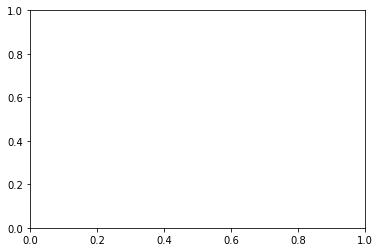

In [6]:
plt.boxplot(df)